In [1]:
#import the basic libraries
import pandas as pd
import numpy as np

#read the dataset
dataset = pd.read_csv('Final.csv')
dataset.head()

,Mean_R,RMS_R,Median_R,Variance_R,Std_R,Skewness_R,Kurtosis_R,Contrast_R,Entropy_R,Energy_R,...,Skewness_B,Kurtosis_B,Contrast_B,Entropy_B,Energy_B,Homogeneity_B,Correlation_B,IDM_B,Smoothness_B,Label
0,0.499272,0.530498,0.521569,0.032156,0.179320,-0.484763,-0.322512,7.417660,956.450061,0.010660,...,-0.407196,-0.696663,7.517717,946.369715,0.011527,0.075315,0.824158,0.001056,0.014440,0
1,0.450862,0.493341,0.482412,0.040108,0.200270,-0.025098,-1.355651,7.058108,360.687224,0.015127,...,0.163490,-1.162955,7.040838,359.933441,0.015140,0.094008,0.919477,0.002771,0.005492,0
2,0.490711,0.529387,0.552941,0.039453,0.198628,-0.561403,-0.793254,7.469795,604.175751,0.010409,...,-0.467573,-1.005314,7.497503,601.133165,0.010352,0.060593,0.896033,0.001661,0.009172,0
3,0.456121,0.516174,0.470588,0.058389,0.241638,-0.111255,-1.422784,7.603757,787.841958,0.011805,...,-0.061711,-1.496490,7.352011,770.710692,0.018813,0.113546,0.885132,0.001296,0.011759,0
4,0.666764,0.680847,0.701961,0.018978,0.137762,-0.641985,-0.495426,6.970347,147.902145,0.018236,...,-0.336407,-1.415606,7.252476,151.646691,0.017100,0.140658,0.974893,0.006552,0.002314,0


In [2]:
#now find the number of 1s and 0s
dataset['Label'].value_counts()

1    620
0    430
Name: Label, dtype: int64

In [3]:
#check for missing values
dataset.isnull().sum()

Mean_R           0
RMS_R            0
Median_R         0
Variance_R       0
Std_R            0
Skewness_R       0
Kurtosis_R       0
Contrast_R       0
Entropy_R        0
Energy_R         0
Homogeneity_R    0
Correlation_R    0
IDM_R            0
Smoothness_R     0
Mean_G           0
RMS_G            0
Median_G         0
Variance_G       0
Std_G            0
Skewness_G       0
Kurtosis_G       0
Contrast_G       0
Entropy_G        0
Energy_G         0
Homogeneity_G    0
Correlation_G    0
IDM_G            0
Smoothness_G     0
Mean_B           0
RMS_B            0
Median_B         0
Variance_B       0
Std_B            0
Skewness_B       0
Kurtosis_B       0
Contrast_B       0
Entropy_B        0
Energy_B         0
Homogeneity_B    0
Correlation_B    0
IDM_B            0
Smoothness_B     0
Label            0
dtype: int64

In [4]:
#length of dataset
len(dataset)

1050

In [5]:
#find descriptive statistics
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Mean_R         1050 non-null   float64
 1   RMS_R          1050 non-null   float64
 2   Median_R       1050 non-null   float64
 3   Variance_R     1050 non-null   float64
 4   Std_R          1050 non-null   float64
 5   Skewness_R     1050 non-null   float64
 6   Kurtosis_R     1050 non-null   float64
 7   Contrast_R     1050 non-null   float64
 8   Entropy_R      1050 non-null   float64
 9   Energy_R       1050 non-null   float64
 10  Homogeneity_R  1050 non-null   float64
 11  Correlation_R  1050 non-null   float64
 12  IDM_R          1050 non-null   float64
 13  Smoothness_R   1050 non-null   float64
 14  Mean_G         1050 non-null   float64
 15  RMS_G          1050 non-null   float64
 16  Median_G       1050 non-null   float64
 17  Variance_G     1050 non-null   float64
 18  Std_G   

In [6]:
#now classify dataset into dependent and independent parts
x = dataset.iloc[:, : -1]
y = dataset.iloc[:, -1]


In [7]:
#check dimentions of x and y
print("The shape of x", x.shape)
print("The shape of y", y.shape)

The shape of x (1050, 42)
The shape of y (1050,)


In [8]:
#scale data in x
from sklearn.preprocessing import Normalizer
# sc = Normalizer()
# x = sc.fit(x).transform(x)


#split x and y into training and testing
#import train_test_split from sklearn
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

#now scale the model using normal scaling method
# sc = Normalizer()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

#import the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

#fit the model
knn.fit(x_train, y_train)

#predict output
pred = knn.predict(x_test)


#now lets measure the accuracy and confussion matrix
#lets now find the accuracy
from sklearn.metrics import accuracy_score
print("The accuracy for main data is ", accuracy_score(y_test, pred))

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred, y_test)
print(cm)

#classification report
from sklearn.metrics import classification_report
print(classification_report(pred, y_test))

The accuracy for main data is  0.9619047619047619
[[46  4]
 [ 0 55]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        50
           1       0.93      1.00      0.96        55

    accuracy                           0.96       105
   macro avg       0.97      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



<Axes: >

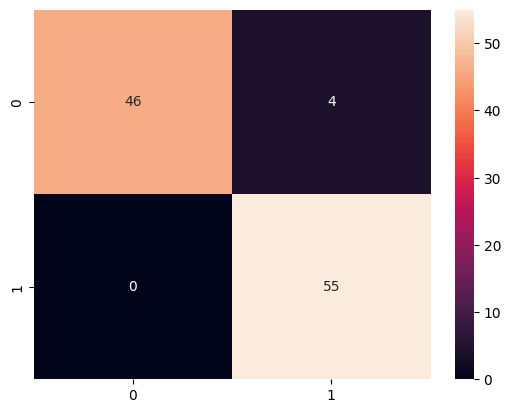

In [11]:
import seaborn as sb
sb.heatmap(confusion_matrix(pred, y_test), annot=True)

[Text(0, 0.5, 'Health'), Text(0, 1.5, 'Unhealthy')]

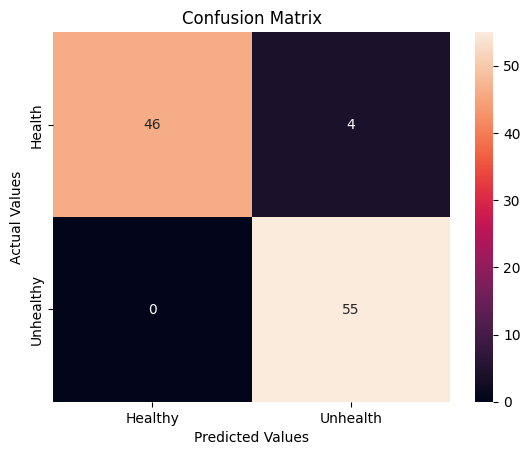

In [12]:
#now confusion matrix with labels
import matplotlib.pyplot as plt

ax= plt.subplot()
sb.heatmap(cm, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Values');ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['Healthy', 'Unhealth']); ax.yaxis.set_ticklabels(['Health', 'Unhealthy'])

Minimum error:- 0.051094890510948905 at K = 0


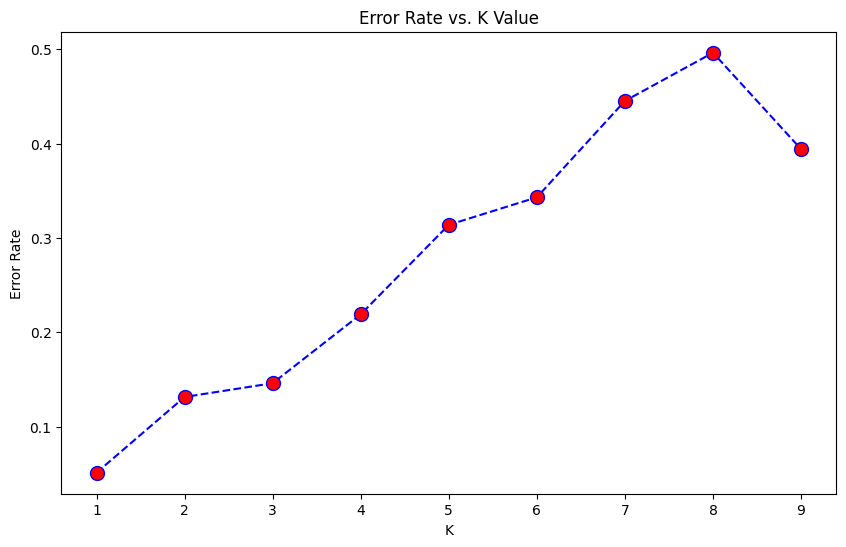

In [99]:
#in the code below we are trying to calculate the best number of neighbors to have good results
import matplotlib.pyplot as plt
error_rate = []
for i in range(1,10):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))